In [ ]:
!pip3 install pygad
# !pip3 install pytorch
import pygad
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy
# import torch
import numpy as np
import logging
import pandas as pd
import matplotlib.pyplot as plt
tf.get_logger().setLevel(logging.ERROR)
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
# 載入訓練資料集(cap loss)
data_train_cl = pd.read_csv(
    "/content/data/cl.csv",
    names=["fsw", "cap", "ind", "pl_c"])

f_range = {'f_min':20e3,'f_max':200e3}
c_range = {'c_min':47e-6,'c_max':726e-6}
l_range = {'l_min':100e-6,'l_max':1000e-6}
# 訓練資料集格式
data_features_cl = data_train_cl.copy()
data_labels_cl = data_features_cl.pop('pl_c')
print(np.std(data_labels_cl))
# 資料標籤歸一化
scaler_cl = MinMaxScaler(feature_range=(1, 5))
data_labels_cl = scaler_cl.fit_transform(data_labels_cl.values.reshape(-1, 1))

# print(data_features['fsw'])
# print(data_features['cap'])
data_features_cl = np.array(data_features_cl)

# type(data_features)
# print(data_features.shape)
# print(data_features)
# print(data_labels_cl)

# 載入訓練資料集(inductor loss)
data_train_indl = pd.read_csv(
    "/content/data/indl.csv",
    names=["fsw", "cap", "ind", "pl_i_cu"])


# 訓練資料集格式
data_features_indl = data_train_indl.copy()
data_labels_indl = data_features_indl.pop('pl_i_cu')

data_features_indl = np.array(data_features_indl)

# 載入訓練資料集(ripple)
data_train_ripple = pd.read_csv(
    "/content/data/ripple.csv",
    names=["fsw", "cap", "ind", "ripple_v", "ripple_c"])


# 訓練資料集格式
data_features_ripple = data_train_ripple.copy()
data_labels_ripple_v = data_features_ripple.pop('ripple_v')
data_labels_ripple_c = data_features_ripple.pop('ripple_c')
# 資料標籤歸一化
scaler_ripple_v = MinMaxScaler(feature_range=(1, 5))
data_labels_ripple_v = scaler_ripple_v.fit_transform(data_labels_ripple_v.values.reshape(-1, 1))
# 資料標籤歸一化
scaler_ripple_c = MinMaxScaler(feature_range=(1, 10))
data_labels_ripple_c = scaler_ripple_c.fit_transform(data_labels_ripple_c.values.reshape(-1, 1))

# 載入訓練資料集(switch loss)
data_train_sw = pd.read_csv(
    "/content/data/sw.csv",
    names=["fsw", "cap", "ind", "pl_sw_h", "pl_sw_l"])


# 訓練資料集格式
data_features_sw = data_train_sw.copy()
data_labels_sw_h = data_features_sw.pop('pl_sw_h')
data_labels_sw_l = data_features_sw.pop('pl_sw_l')
# 資料標籤標準化
scaler_sw_h = StandardScaler()
data_labels_sw_h = scaler_sw_h.fit_transform(data_labels_sw_h.values.reshape(-1, 1))
# 資料標籤標準化
scaler_sw_l = StandardScaler()
data_labels_sw_l = scaler_sw_l.fit_transform(data_labels_sw_l.values.reshape(-1, 1))

data_features_sw['fsw'] = (data_features_sw['fsw']-f_range['f_min'])/(f_range['f_max']-f_range['f_min'])
data_features_sw['cap'] = (data_features_sw['cap']-c_range['c_min'])/(c_range['c_max']-c_range['c_min'])
data_features_sw['ind'] = (data_features_sw['ind']-l_range['l_min'])/(l_range['l_max']-l_range['l_min'])
data_features=data_features_sw
#取出測試資料集以及驗證資料集

print(data_features)
print(data_labels_cl)
print(data_labels_indl)
print(data_labels_ripple_v)
print(data_labels_ripple_c)
print(data_labels_sw_h)
print(data_labels_sw_l)


0.0007450286048324904
      fsw  cap       ind
0     0.0  0.0  0.000000
1     0.0  0.0  0.052631
2     0.0  0.0  0.105263
3     0.0  0.0  0.157894
4     0.0  0.0  0.210527
...   ...  ...       ...
7995  1.0  1.0  0.789473
7996  1.0  1.0  0.842106
7997  1.0  1.0  0.894737
7998  1.0  1.0  0.947369
7999  1.0  1.0  1.000000

[8000 rows x 3 columns]
[[5.        ]
 [2.85333989]
 [2.06481264]
 ...
 [1.00000029]
 [1.00000044]
 [1.00017331]]
0       1.44223
1       2.07114
2       2.36920
3       2.63531
4       2.87757
         ...   
7995    4.83227
7996    4.97145
7997    5.10671
7998    5.23964
7999    5.36851
Name: pl_i_cu, Length: 8000, dtype: float64
[[2.09606562]
 [1.74339628]
 [1.60287752]
 ...
 [1.00420102]
 [1.0268851 ]
 [1.71082369]]
[[9.85053741]
 [7.00653704]
 [5.60229856]
 ...
 [1.01544238]
 [1.08037287]
 [2.98932313]]
[[-1.62752347]
 [-1.5540935 ]
 [-1.25944613]
 ...
 [ 1.73885146]
 [ 1.72797078]
 [ 1.7100589 ]]
[[-1.78417907]
 [-1.88229442]
 [ 3.47989818]
 ...
 [ 1.21179066]
 [

Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 7.1770 - val_loss: 1.2301
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1435 - val_loss: 1.2344
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0630 - val_loss: 1.2168
Epoch 4/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0503 - val_loss: 1.1776
Epoch 5/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0480 - val_loss: 1.0746
Epoch 6/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0430 - val_loss: 0.8360
Epoch 7/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0527 - val_loss: 0.5348
Epoch 8/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0464 - val_loss: 0.2328
Epoch 9/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - val_loss: 0.1570
Epoch 10/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0406 - val_loss: 0.1313
Epoch 11/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0394 - val_loss: 0.1301
Epoch 12/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0383

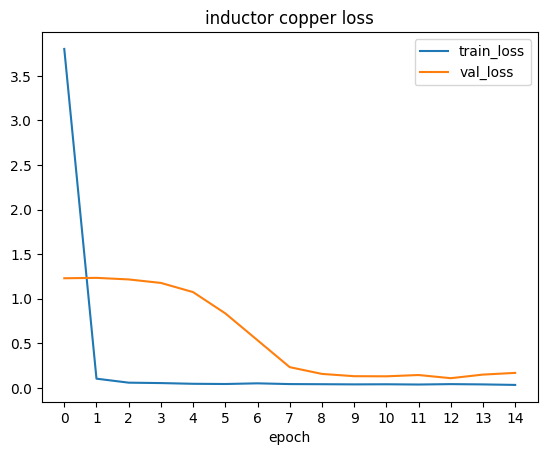

In [ ]:
#inductor loss BN-NN
initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)

ACTIVATIONS = 'relu'
ACTIVATIONS_OUT = 'relu'

model_indl_cu = keras.Sequential([

   #BN-NN layer 1 (20個神經元)
   keras.layers.Dense(20, activation='softmax',
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (20個神經元)
   keras.layers.Dense(20, activation='softmax',
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 3 (20個神經元)
   keras.layers.Dense(20, activation='softmax',
                       kernel_initializer=initializer3,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation='relu',
                       kernel_initializer=initializer4,
                       bias_initializer=bias_initializer)
])

EPOCHS = 10 #設定訓練總週期
BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'
opt4 = keras.optimizers.SGD(learning_rate=0.01)
model_indl_cu.compile(loss=LOSS, optimizer = opt4)

history_indl_cu = model_indl_cu.fit(data_features, data_labels_indl,
                    validation_split = 0.3,
                    epochs=15, batch_size=BATCH_SIZE
                   )

predict = model_indl_cu.predict(data_features)
r2 = r2_score(data_labels_indl, predict)

print(f"R²: {r2:.2f}")
# print(history_sw_h.history.keys()) #查詢key值
#plot trian set and validation set a.accurate b.loss
def print_history(history,title,x,y):
  # plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title(title)
  plt.xlabel('epoch')
  plt.legend()
  x_major_locator = plt.MultipleLocator(x)
  y_major_locator = plt.MultipleLocator(y)
  ax = plt.gca()
  ax.xaxis.set_major_locator(x_major_locator)
  ax.yaxis.set_major_locator(y_major_locator)
  plt.show()


print_history(history_indl_cu,'inductor copper loss',1,0.5)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.0186 - val_loss: 1.9542
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8913 - val_loss: 1.0721
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6280 - val_loss: 0.5035
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5151 - val_loss: 0.2889
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5057 - val_loss: 0.2160
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5710 - val_loss: 0.3141
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5284 - val_loss: 0.3769
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5148 - val_loss: 0.4113
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4784 - val_loss: 0.4623
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4882 - val_loss: 0.3987
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4762 - val_loss: 0.3879
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4686 - val_lo

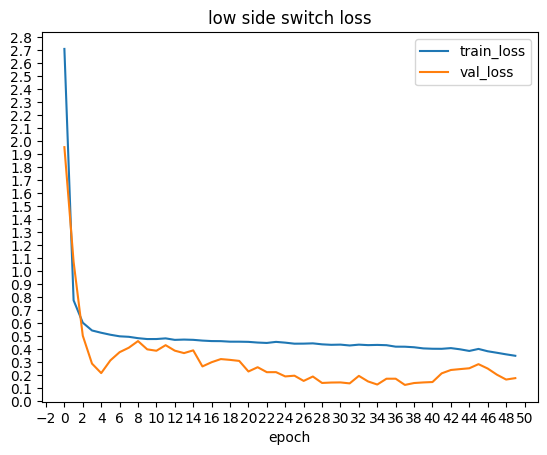

In [ ]:
#switch loss low side BN-NN
initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)

ACTIVATIONS = 'tanh'
ACTIVATIONS_OUT = 'linear'

model_sw_l = keras.Sequential([

   #BN-NN layer 1 (10個神經元)
   keras.layers.Dense(10, activation='relu',
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (10個神經元)
   keras.layers.Dense(10, activation='relu',
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 3 (10個神經元)
   keras.layers.Dense(10, activation='relu',
                       kernel_initializer=initializer3,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation='linear',
                       kernel_initializer=initializer4,
                       bias_initializer=bias_initializer)
])

EPOCHS = 10 #設定訓練總週期
BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'

opt3 = keras.optimizers.Adam(learning_rate=0.001)


model_sw_l.compile(loss=LOSS, optimizer = opt3)

history_sw_l = model_sw_l.fit(data_features, data_labels_sw_l,
                    validation_split = 0.3,
                    epochs=50, batch_size=BATCH_SIZE
                    )
#印出R^2
predict = model_sw_l.predict(data_features)
r2 = r2_score(data_labels_sw_l, predict)
print(f"R²: {r2:.2f}")
print_history(history_sw_l,'low side switch loss',2,0.1)


Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3417 - val_loss: 1.5246
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0275 - val_loss: 1.7333
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - val_loss: 1.1938
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.8484
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - val_loss: 0.6471
Epoch 6/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - val_loss: 0.5785
Epoch 7/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177 - val_loss: 0.4469
Epoch 8/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - val_loss: 0.2282
Epoch 9/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184 - val_loss: 0.2252
Epoch 10/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - val_loss: 0.2454
Epoch 11/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.2823
Epoch 12/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_lo

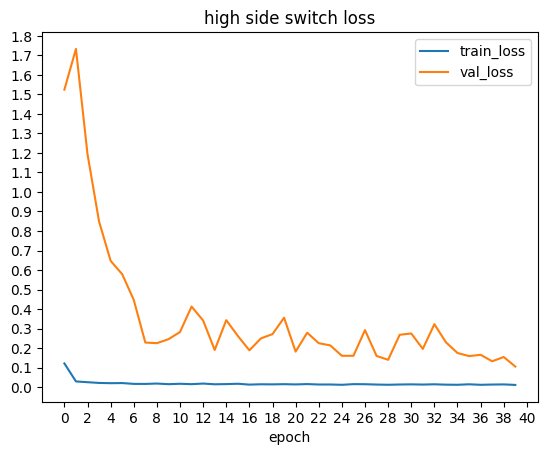

In [ ]:
#High side switch BN-NN
initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)


ACTIVATIONS = 'tanh'
ACTIVATIONS_OUT = 'linear'

model_sw_h = keras.Sequential([

   #BN-NN layer 1 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 3 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer3,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
                       kernel_initializer=initializer4,
                       bias_initializer=bias_initializer)
])

BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'

opt2 = keras.optimizers.Adam(learning_rate=0.01)

model_sw_h.compile(loss=LOSS, optimizer = opt2)

history_sw_h = model_sw_h.fit(data_features, data_labels_sw_h,
                    validation_split = 0.3,
                    epochs=40, batch_size=BATCH_SIZE
                    )
#印出R^2
predict = model_sw_l.predict(data_features)
r2 = r2_score(data_labels_sw_h, predict)
print(f"R²: {r2:.2f}")

print_history(history_sw_h,'high side switch loss',2,0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7816 - val_loss: 0.0309
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0343 - val_loss: 0.0267
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0232 - val_loss: 0.0207
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0244 - val_loss: 0.0227
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0148 - val_loss: 0.0227
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 - val_loss: 0.0229
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 - val_loss: 0.0200
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0188
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0148
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 - val_loss: 0.0168
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 - val_loss: 0.0126
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135 - val_lo

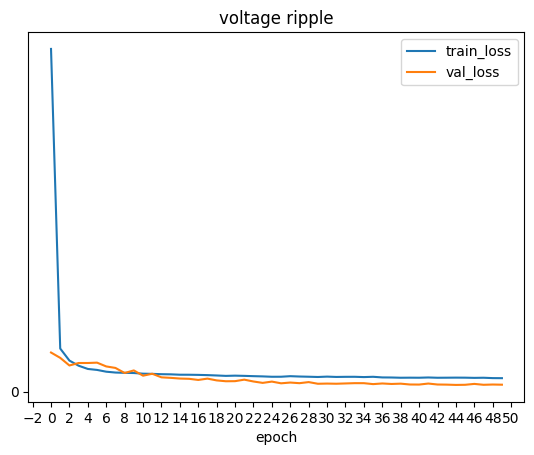

In [ ]:
#Voltage ripple BN-NN
initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=0.01, maxval=0.1)

ACTIVATIONS = 'tanh'
ACTIVATIONS_OUT = 'linear'

model_ripple_v = keras.Sequential([

   #BN-NN layer 1 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
  #  #BN-NN layer 3 (10個神經元)
  #  keras.layers.Dense(10, activation=ACTIVATIONS,
  #                      kernel_initializer=initializer3,
  #                      bias_initializer=bias_initializer),
  #  keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
                       kernel_initializer=initializer4,
                       bias_initializer=bias_initializer)
])

BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'

opt5 = keras.optimizers.SGD(learning_rate=0.01)
model_ripple_v.compile(loss=LOSS, optimizer = opt5)


history_ripple_v = model_ripple_v.fit(data_features, data_labels_ripple_v,
                    validation_split = 0.3,
                    epochs=50, batch_size=BATCH_SIZE
                    )
predict = model_ripple_v.predict(data_features)
r2 = r2_score(data_labels_ripple_v, predict)
print(f"R²: {r2:.2f}")

print_history(history_ripple_v,'voltage ripple',2,1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.6424 - val_loss: 0.7339
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.6039 - val_loss: 0.3528
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8520 - val_loss: 0.2574
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5124 - val_loss: 0.2281
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4021 - val_loss: 0.1894
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3823 - val_loss: 0.1768
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3834 - val_loss: 0.1703
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3537 - val_loss: 0.1637
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2982 - val_loss: 0.1593
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2467 - val_loss: 0.1650
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2792 - val_loss: 0.1634
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2809 - val_l

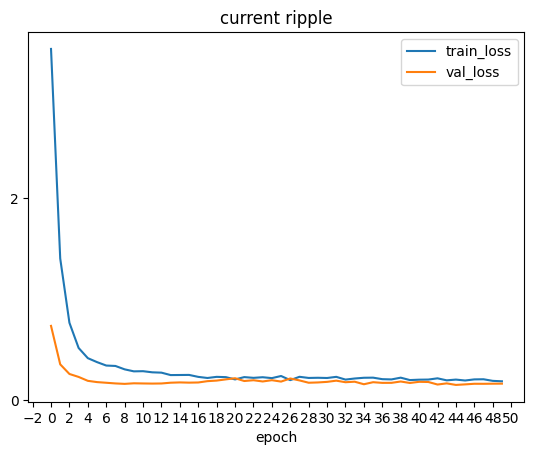

In [ ]:
#Current ripple BN-NN

initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=0.01, maxval=0.1)

ACTIVATIONS = 'relu'
ACTIVATIONS_OUT = 'linear'

model_ripple_c = keras.Sequential([

   #BN-NN layer 1 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
  #  #BN-NN layer 3 (20個神經元)
  #  keras.layers.Dense(10, activation=ACTIVATIONS,
  #                      kernel_initializer=initializer3,
  #                      bias_initializer=bias_initializer),
  #  keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
                       kernel_initializer=initializer4,
                       bias_initializer=bias_initializer)
])


BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'

opt6 = keras.optimizers.SGD(learning_rate=0.001)

model_ripple_c.compile(loss=LOSS, optimizer = opt6)

history_ripple_c = model_ripple_c.fit(data_features, data_labels_ripple_c,
                    validation_split = 0.3,
                    epochs=50, batch_size=BATCH_SIZE
                    )
predict = model_ripple_c.predict(data_features)
r2 = r2_score(data_labels_ripple_c, predict)
print(f"R²: {r2:.2f}")

print_history(history_ripple_c,'current ripple',2,2)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8121 - val_loss: 0.0455
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459 - val_loss: 0.0294
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0380 - val_loss: 0.0132
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0232 - val_loss: 0.0163
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0216 - val_loss: 0.0264
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - val_loss: 0.0355
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - val_loss: 0.0348
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0334
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - val_loss: 0.0311
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0309
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - val_loss: 0.0271
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_lo

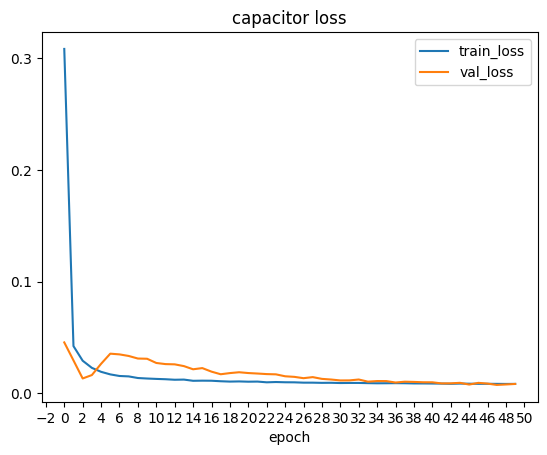

In [ ]:
#Cap loss BN-NN

initializer1 = keras.initializers.he_normal()

initializer2 = keras.initializers.he_normal()

initializer3 = keras.initializers.he_normal()

initializer4 = keras.initializers.he_normal()

bias_initializer=keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)

ACTIVATIONS = 'tanh'
ACTIVATIONS_OUT = 'linear'

model_cl = keras.Sequential([
   #BN-NN layer 1 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer1,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 2 (10個神經元)
   keras.layers.Dense(10, activation=ACTIVATIONS,
                       kernel_initializer=initializer2,
                       bias_initializer=bias_initializer),
   keras.layers.BatchNormalization(),
   #BN-NN layer 3 (8個神經元)
  #  keras.layers.Dense(8, activation='tanh',
  #                      kernel_initializer=initializer,
  #                      bias_initializer='zeros'),
  #  keras.layers.BatchNormalization(),
   #output layer (直接輸出)
   keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
                       kernel_initializer=initializer3,
                       bias_initializer=bias_initializer)
])

BATCH_SIZE = 64 #每小批次取1個樣本來訓練
LOSS = 'mean_squared_error' #損失函數
LOSS2 = 'binary_crossentropy'
opt = keras.optimizers.SGD(learning_rate=0.01)

model_cl.compile(loss=LOSS, optimizer = opt)


history_cl = model_cl.fit(data_features, data_labels_cl,
                    validation_split = 0.3,
                    epochs=50, batch_size=BATCH_SIZE
                    )
predict = model_cl.predict(data_features)
r2 = r2_score(data_labels_cl, predict)
print(f"R²: {r2:.2f}")


print_history(history_cl,'capacitor loss',2,0.1)

In [ ]:
# # 權重初始化物件 (使用Random Uniform)
# # initializer1 = keras.initializers.RandomUniform(
# #     minval=-0.1, maxval=0.1)

# # initializer2 = keras.initializers.RandomUniform(
# #     minval=-0.1, maxval=0.1)

# # initializer3 = keras.initializers.RandomUniform(
# #     minval=-0.1, maxval=0.1)

# # initializer4 = keras.initializers.RandomUniform(
# #     minval=-0.1, maxval=0.1)

# initializer1 = keras.initializers.he_normal()

# initializer2 = keras.initializers.he_normal()

# initializer3 = keras.initializers.he_normal()

# initializer4 = keras.initializers.he_normal()

# bias_initializer=keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)

# # 創建以下結構的序列式模型：
# # 三個輸入變量 fs:開關頻率 L:電感值 C:電容值

# # 三層密集(全連接)層,各含12,10,8個神經元
# # 每層密集層後面接batch normalization層
# # 隱藏層輸出函數使用tanh
# # 輸出層直接輸出 a.losse of switch 兩個輸出神經元 b.inductor losses 兩個輸出神經元 c.capacitor loss 兩個輸出神經元 d.Ripples 一個輸出神經元

# ACTIVATIONS = 'relu'
# ACTIVATIONS_OUT = 'relu'


# model_cl = keras.Sequential([
#    #BN-NN layer 1 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (8個神經元)
#   #  keras.layers.Dense(8, activation='tanh',
#   #                      kernel_initializer=initializer,
#   #                      bias_initializer='zeros'),
#   #  keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer)
# ])


# model_sw_h = keras.Sequential([

#    #BN-NN layer 1 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
#                        kernel_initializer=initializer4,
#                        bias_initializer=bias_initializer)
# ])

# model_sw_l = keras.Sequential([

#    #BN-NN layer 1 (10個神經元)
#    keras.layers.Dense(10, activation='relu',
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (10個神經元)
#    keras.layers.Dense(10, activation='relu',
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (10個神經元)
#    keras.layers.Dense(10, activation='relu',
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation='linear',
#                        kernel_initializer=initializer4,
#                        bias_initializer=bias_initializer)
# ])

# model_indl_cu = keras.Sequential([

#    #BN-NN layer 1 (20個神經元)
#    keras.layers.Dense(20, activation='softmax',
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (20個神經元)
#    keras.layers.Dense(20, activation='softmax',
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (20個神經元)
#    keras.layers.Dense(20, activation='softmax',
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation='relu',
#                        kernel_initializer=initializer4,
#                        bias_initializer=bias_initializer)
# ])

# model_ripple_v = keras.Sequential([

#    #BN-NN layer 1 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
#                        kernel_initializer=initializer4,
#                        bias_initializer=bias_initializer)
# ])

# model_ripple_c = keras.Sequential([

#    #BN-NN layer 1 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer1,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 2 (10個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer2,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #BN-NN layer 3 (20個神經元)
#    keras.layers.Dense(10, activation=ACTIVATIONS,
#                        kernel_initializer=initializer3,
#                        bias_initializer=bias_initializer),
#    keras.layers.BatchNormalization(),
#    #output layer (直接輸出)
#    keras.layers.Dense(1, activation=ACTIVATIONS_OUT,
#                        kernel_initializer=initializer4,
#                        bias_initializer=bias_initializer)
# ])

# # 除了使用隨機梯度下降法（SGD）
# # 與學習率0.01以外，無其他有的沒的
# # 損失以MSE計量，訓練全程監看準確率

# EPOCHS = 10 #設定訓練總週期
# BATCH_SIZE = 64 #每小批次取1個樣本來訓練
# LOSS = 'mean_squared_error' #損失函數
# LOSS2 = 'binary_crossentropy'
# opt = keras.optimizers.SGD(learning_rate=0.01)
# opt2 = keras.optimizers.SGD(learning_rate=0.01)
# opt3 = keras.optimizers.SGD(learning_rate=0.01)
# opt4 = keras.optimizers.SGD(learning_rate=0.01)
# opt5 = keras.optimizers.SGD(learning_rate=0.01)
# opt6 = keras.optimizers.SGD(learning_rate=0.01)
# model_cl.compile(loss=LOSS, optimizer = opt)
# model_sw_h.compile(loss=LOSS, optimizer = opt2)
# model_sw_l.compile(loss=LOSS, optimizer = opt3)
# model_indl_cu.compile(loss=LOSS, optimizer = opt4)
# model_ripple_v.compile(loss=LOSS, optimizer = opt5)
# model_ripple_c.compile(loss=LOSS, optimizer = opt6)

# # 模型訓練週期為20
# # 每週期開始時重新（隨機）打散樣本順序
# # 批次量為1（batch_size=1），一批次結束時更新權重

# history_sw_h = model_sw_h.fit(data_features, data_labels_sw_h,
#                     validation_split = 0.3,
#                     epochs=40, batch_size=BATCH_SIZE
#                     )
# history_sw_l = model_sw_l.fit(data_features, data_labels_sw_l,
#                     validation_split = 0.3,
#                     epochs=40, batch_size=BATCH_SIZE
#                     )
# history_cl = model_cl.fit(data_features, data_labels_cl,
#                     validation_split = 0.3,
#                     epochs=30, batch_size=BATCH_SIZE
#                     )
# history_indl_cu = model_indl_cu.fit(data_features, data_labels_indl,
#                     validation_split = 0.3,
#                     epochs=15, batch_size=BATCH_SIZE
#                     )
# history_ripple_v = model_ripple_v.fit(data_features, data_labels_ripple_v,
#                     validation_split = 0.3,
#                     epochs=30, batch_size=BATCH_SIZE
#                     )
# history_ripple_c = model_ripple_c.fit(data_features, data_labels_ripple_c,
#                     validation_split = 0.3,
#                     epochs=10, batch_size=BATCH_SIZE
#                     )




[[0.08888889 0.09572901 0.20144444]]
<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
loss of cap:[[0.00099533]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
loss of high side　switch:[[1.6363955]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
loss of low side　switch:[[0.35491717]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
copper loss of inductor:[[2.709953]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
voltage ripple:[[1.0314687]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
curent ripple:[[14.336955]]


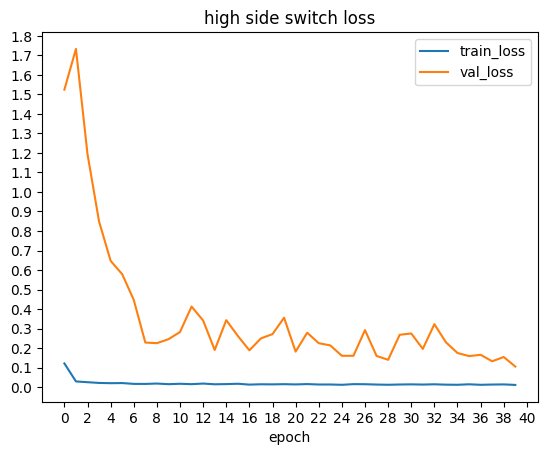

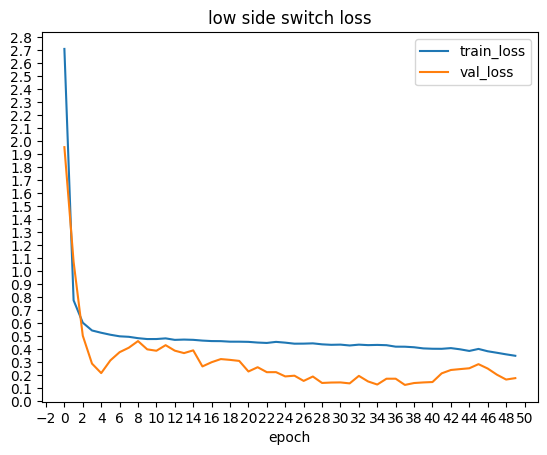

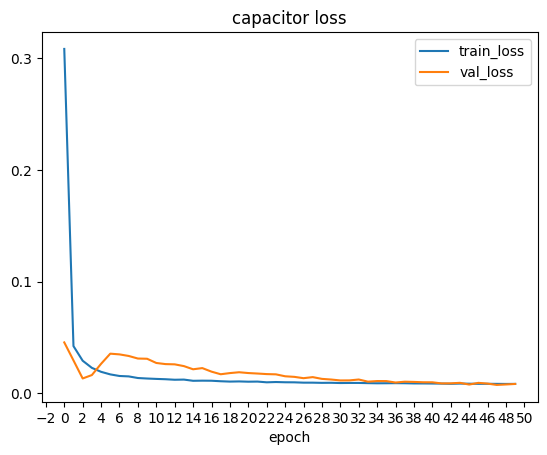

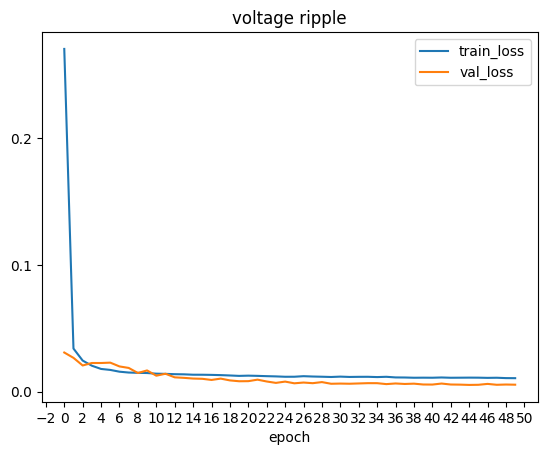

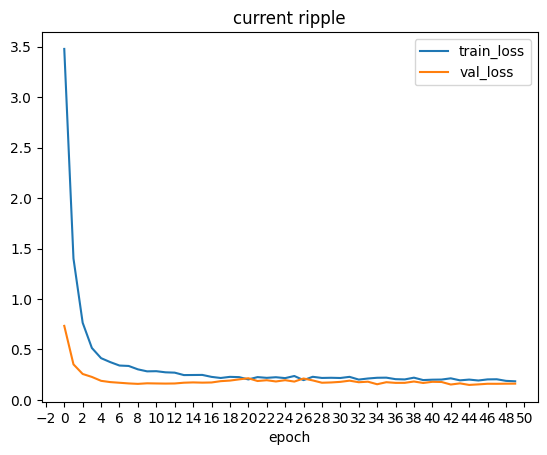

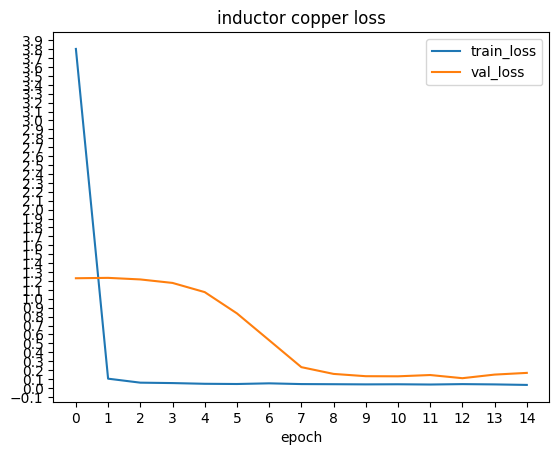

In [ ]:
#測試訓練好的神經網路
dp = [36e3, 112e-6, 281.3e-6]
fsw = (dp[0]-f_range['f_min'])/(f_range['f_max']-f_range['f_min'])
cap = (dp[1]-c_range['c_min'])/(c_range['c_max']-c_range['c_min'])
ind = (dp[2]-l_range['l_min'])/(l_range['l_max']-l_range['l_min'])
test_np_array = np.array([[fsw, cap, ind]])
print(test_np_array)
print(type(test_np_array))

loss_of_cap = model_cl.predict(test_np_array) # Change input to 2D array
loss_of_cap = scaler_cl.inverse_transform(loss_of_cap)
print(f"loss of cap:{loss_of_cap}")

loss_of_sw_h = model_sw_h.predict(test_np_array) # Change input to 2D array
loss_of_sw_h = scaler_sw_h.inverse_transform(loss_of_sw_h)
print(f"loss of high side　switch:{loss_of_sw_h}")

loss_of_sw_l = model_sw_l.predict(test_np_array) # Change input to 2D array
loss_of_sw_l = scaler_sw_l.inverse_transform(loss_of_sw_l)
print(f"loss of low side　switch:{loss_of_sw_l}")

loss_of_inductor_cu = model_indl_cu.predict(test_np_array) # Change input to 2D array
print(f"copper loss of inductor:{loss_of_inductor_cu}")

ripple_v = model_ripple_v.predict(test_np_array) # Change input to 2D array
ripple_v = scaler_ripple_v.inverse_transform(ripple_v)
print(f"voltage ripple:{ripple_v}")

ripple_c = model_ripple_c.predict(test_np_array) # Change input to 2D array
ripple_c = scaler_ripple_c.inverse_transform(ripple_c)
print(f"curent ripple:{ripple_c}")

# print(history_sw_h.history.keys()) #查詢key值
#plot trian set and validation set a.accurate b.loss
def print_history(history,title,x,y):
  # plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title(title)
  plt.xlabel('epoch')
  plt.legend()
  x_major_locator = plt.MultipleLocator(x)
  y_major_locator = plt.MultipleLocator(y)
  ax = plt.gca()
  ax.xaxis.set_major_locator(x_major_locator)
  ax.yaxis.set_major_locator(y_major_locator)
  plt.show()

print_history(history_sw_h,'high side switch loss',2,0.1)
print_history(history_sw_l,'low side switch loss',2,0.1)
print_history(history_cl,'capacitor loss',2,0.1)
print_history(history_ripple_v,'voltage ripple',2,0.1)
print_history(history_ripple_c,'current ripple',2,0.5)
print_history(history_indl_cu,'inductor copper loss',1,0.1)

In [ ]:
#access database to get capacitor and inductor database
#產生開關頻率 20kHz ~ 200kHz (step 0.1k Hz)
fsw = []
fsw_max = 200e3
fsw_min = 20e3
fsw_temp= fsw_min
while True:
    if fsw_temp > fsw_max:
        break
    fsw.append(fsw_temp)
    fsw_temp += 100

#產生電感值 Lmin = 30uH Lmax = 2mH
ind = []
ind_table = pd.read_csv("/content/data/ind_table.csv", names=["part_no","value","ESR","ind_N","volume"])
#選擇存成list格式的特定行
selected_colums = ['value','volume','part_no','ind_N','ESR']
#將選擇的行存到list中
list_of_selected_columns = [ind_table[column].tolist() for column in selected_colums]

# print(list_of_selected_columns)
#去除標題
list_of_value_ind = list_of_selected_columns[0]
list_of_value_ind.pop(0)
list_of_volume_ind = list_of_selected_columns[1]
list_of_volume_ind.pop(0)
list_of_part_no_ind = list_of_selected_columns[2]
list_of_part_no_ind.pop(0)
list_of_ind_N = list_of_selected_columns[3]
list_of_ind_N.pop(0)
list_of_ESR_ind = list_of_selected_columns[4]
list_of_ESR_ind.pop(0)
#save inductance to ind[]
float_ind_value_list = [float(item)*1e-6 for item in list_of_value_ind]
ind = float_ind_value_list

#從lookup table取得電容值 Cmin = 20uF Cmax = 1000uF
cap = []
#讀取cap_table 並且儲存[[cap_v1, cap_v2 ...] [cap_volume1, cap_volume2 ...] [part_no_1, part_no_2 ...]]
#讀取下來的資料為pandas dataframe格式
cap_table = pd.read_csv("/content/data/cap_table.csv", names=["part_no","value","volume","ESR","ESL"])
#選擇存成list格式的特定行
selected_colums = ['value','volume','part_no','ESR','ESL']
#將選擇的行存到list中
list_of_selected_columns = [cap_table[column].tolist() for column in selected_colums]

# print(list_of_selected_columns)
#去除標題
list_of_value_cap = list_of_selected_columns[0]
list_of_value_cap.pop(0)
list_of_volume_cap = list_of_selected_columns[1]
list_of_volume_cap.pop(0)
list_of_part_no_cap = list_of_selected_columns[2]
list_of_part_no_cap.pop(0)
list_of_ESR_cap = list_of_selected_columns[3]
list_of_ESR_cap.pop(0)
list_of_ESL_cap = list_of_selected_columns[4]
list_of_ESL_cap.pop(0)

#save capacitance to cap[]
float_cap_value_list = [float(item)*1e-6 for item in list_of_value_cap]
cap = float_cap_value_list

#Genetic algorithm

#store oi result for each generation
oi = []
#xi is a small constant
xi = 0.00001
#volume limit (cm^3) / ripple limit unit(%)
vol_lim = 7.0
ripple_v_lim = 1
ripple_c_lim = 10
#capacitor and inductor volume from database

#fitness_func 有三個輸入變數1. the instance of the pygad.GA class 2.single solution(gene) 3.its index in the population
def fitness_func(ga_instance, solution, solution_idx):
    #使用神經網路計算1.損耗 2.輸出電壓漣波 3.輸出電流漣波 4.規格表查元件體積
    #計算所有個體的目標值
    #找出最大的目標值存為Omax
    #找出最小的目標值存為Omin
    #計算fitness函數
    omax = max(oi)
    omin = min(oi)
    fitness = (omax - oi[solution_idx])/(omax - omin) + xi
    # change fitness from ndarray to float ??
    fitness = fitness[0]
    print(f"Fitness : {fitness}")
    return fitness

def on_start(ga_instance):
    global oi
    oi = []
    print(f"Generation = {ga_instance.generations_completed}")

    for idx in range(ga_instance.population.shape[0]):
        solution = ga_instance.population[idx]
        solution_s = [1,1,1]
        # print(f"index = {idx} Solution = {solution}")
        # calculate total loss of each solutions
        solution_s[0] = (solution[0]-f_range['f_min'])/(f_range['f_max']-f_range['f_min'])
        solution_s[1] = (solution[1]-c_range['c_min'])/(c_range['c_max']-c_range['c_min'])
        solution_s[2] = (solution[2]-l_range['l_min'])/(l_range['l_max']-l_range['l_min'])
        solution_s_np = np.array([solution_s])
        solution = np.array([solution])
        print(f"solution test:{solution[0]}")
        # find vol_l and vol_c
        solution_list = solution.tolist()
        vol_c = float(list_of_volume_cap[float_cap_value_list.index(solution_list[0][1])])
        vol_l = float(list_of_volume_ind[float_ind_value_list.index(solution_list[0][2])])

        print(f"vol_l = {vol_l} vol_c = {vol_c}")

        loss_of_cap = model_cl.predict(solution_s_np)
        loss_of_cap = scaler_cl.inverse_transform(loss_of_cap)
        loss_of_sw_h = model_sw_h.predict(solution_s_np)
        loss_of_sw_h = scaler_sw_h.inverse_transform(loss_of_sw_h)
        loss_of_sw_l = model_sw_l.predict(solution_s_np)
        loss_of_sw_l = scaler_sw_l.inverse_transform(loss_of_sw_l)
        loss_of_inductor_cu = model_indl_cu.predict(solution_s_np)
        ripple_v = model_ripple_v.predict(solution_s_np)
        ripple_v = scaler_ripple_v.inverse_transform(ripple_v)
        ripple_c = model_ripple_c.predict(solution_s_np)
        ripple_c = scaler_ripple_c.inverse_transform(ripple_c)
        power_loss_total = loss_of_cap + loss_of_sw_h + loss_of_sw_l + loss_of_inductor_cu
        oi.append(power_loss_total + max(0 , ((vol_l + vol_c)/vol_lim - 1)) + max(0, ((ripple_v / ripple_v_lim) - 1)) + max(0, ((ripple_c / ripple_c_lim) - 1)))

def on_generation(ga_instance):
    global oi
    oi.clear()
    print(f"Generation = {ga_instance.generations_completed}")

    for idx in range(ga_instance.population.shape[0]):
        solution = ga_instance.population[idx]
        solution_s = [1,1,1]
        solution_s[0] = (solution[0]-f_range['f_min'])/(f_range['f_max']-f_range['f_min'])
        solution_s[1] = (solution[1]-c_range['c_min'])/(c_range['c_max']-c_range['c_min'])
        solution_s[2] = (solution[2]-l_range['l_min'])/(l_range['l_max']-l_range['l_min'])
        solution_s_np = np.array([solution_s])
        print(f"index = {idx} Solution = {solution}")
        solution = np.array([solution])
        print(f"solution test:{solution[0]}")
        # find vol_l and vol_c
        solution_list = solution.tolist()
        vol_c = float(list_of_volume_cap[float_cap_value_list.index(solution_list[0][1])])
        vol_l = float(list_of_volume_ind[float_ind_value_list.index(solution_list[0][2])])

        print(f"vol_l = {vol_l} vol_c = {vol_c}")

        loss_of_cap = model_cl.predict(solution_s_np)
        loss_of_cap = scaler_cl.inverse_transform(loss_of_cap)
        loss_of_sw_h = model_sw_h.predict(solution_s_np)
        loss_of_sw_h = scaler_sw_h.inverse_transform(loss_of_sw_h)
        loss_of_sw_l = model_sw_l.predict(solution_s_np)
        loss_of_sw_l = scaler_sw_l.inverse_transform(loss_of_sw_l)
        loss_of_inductor_cu = model_indl_cu.predict(solution_s_np)
        ripple_v = model_ripple_v.predict(solution_s_np)
        ripple_v = scaler_ripple_v.inverse_transform(ripple_v)
        ripple_c = model_ripple_c.predict(solution_s_np)
        ripple_c = scaler_ripple_c.inverse_transform(ripple_c)
        power_loss_total = loss_of_cap + loss_of_sw_h + loss_of_sw_l + loss_of_inductor_cu
        oi.append(power_loss_total + max(0 , (vol_l + (vol_c)/vol_lim - 1)) + max(0, ((ripple_v / ripple_v_lim) - 1)) + max(0, ((ripple_c / ripple_c_lim) - 1)))

#基因演算法 可調整參數
fitness_function = fitness_func
#演化代數
num_generations = 50
#Number of solutions to be selected as parents
num_parents_mating = 10

#有幾個個體
sol_per_pop = 50

#基因初始值上下限 (改為使用gene_space限制基因的範圍) fsw C L
gene_space = [fsw, cap, ind]

#每個個體有幾個基因(三個fc L C)
num_genes = len(gene_space)


#roulette wheel selection
parent_selection_type = "rws"
keep_parents = 1

crossover_type = "single_point"

mutation_type = None
mutation_num_genes = 0

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes,
                       on_start = on_start,
                       gene_space = gene_space,
                       on_generation = on_generation,
                       mutation_by_replacement=True)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))



Generation = 0
solution test:[1.7560e+05 1.1575e-04 1.3414e-04]
vol_l = 2.034 vol_c = 1.137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:832: UserWarning: The mutation_by_replacement parameter is set to True while the mutation_type parameter is not set to random but (None). Note that the mutation_by_replacement parameter has an effect only when mutation_type='random'.
  warnings.warn(f"The mutation_by_replacement parameter is set to True while the mutation_type parameter is not set to random but ({mutation_type}). Note that the mutation_by_replacement parameter has an effect only when mutation_type='random'.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback functio

串流輸出內容已截斷至最後 5000 行。
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
index = 23 Solution = [6.36000000e+04 5.11140584e-04 2.14270000e-04]
solution test:[6.36000000e+04 5.11140584e-04 2.14270000e-04]
vol_l = 6.305 vol_c = 1.975
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
index = 24 Solution = [1.3590e+05 1.1575e-04 1.8005e-04]
solution test:[1.3590e+05 1.1575e-04 1.8005e-04]
vol_l = 6.305 vol_c = 1.137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
index = 25 Solution = [2.64000000e+04 2.22178218e-04 1.80050000e-04]
solution test:[2.64000000e+04 2.22178218e-04 1.80050000e-04]
vol_l = 6.305 vol_c = 2.325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/st

In [ ]:
#印出使用元件
solution_list = solution.tolist()
# print(type(solution_list))
# print(type(solution_list[1]))
# print(type(solution_list[2]))
# print(solution_list[1])
index_cap = float_cap_value_list.index(solution_list[1])
esr_cap = float(list_of_ESR_cap[float_cap_value_list.index(solution_list[1])])/float(solution_list[0])
esl_cap = list_of_ESL_cap[float_cap_value_list.index(solution_list[1])]
index_ind = float_ind_value_list.index(solution_list[2])
esr_ind = list_of_ESR_ind[float_ind_value_list.index(solution_list[2])]
vol_c = list_of_volume_cap[float_cap_value_list.index(solution_list[1])]
vol_l = list_of_volume_ind[float_ind_value_list.index(solution_list[2])]
part_no_cap = list_of_part_no_cap[float_cap_value_list.index(solution_list[1])]
part_no_ind = list_of_part_no_ind[float_ind_value_list.index(solution_list[2])]
ind_N = list_of_ind_N[float_ind_value_list.index(solution_list[2])]
print("Capacitor part number : {part_no_cap}".format(part_no_cap = part_no_cap))
print("Capacitor ESR : {esr_cap}".format(esr_cap = esr_cap))
print("Capacitor ESL : {esl_cap}".format(esl_cap = esl_cap))
print("Capacitor volume : {vol_c}".format(vol_c = vol_c))
print("Inductor part number : {part_no_ind}".format(part_no_ind = part_no_ind))
print("Inductor turn number : {ind_N}".format(ind_N = ind_N))
print("Inductor ESR : {esr_ind}".format(esr_ind = esr_ind))
print("Inductor volume : {vol_l}".format(vol_l = vol_l))

#最佳解預測
solution_s = [1,1,1]
solution_s[0] = (solution_list[0]-f_range['f_min'])/(f_range['f_max']-f_range['f_min'])
solution_s[1] = (solution_list[1]-c_range['c_min'])/(c_range['c_max']-c_range['c_min'])
solution_s[2] = (solution_list[2]-l_range['l_min'])/(l_range['l_max']-l_range['l_min'])
test_np_array = np.array([solution_s])
loss_of_cap = model_cl.predict(test_np_array) # Change input to 2D array
loss_of_cap = scaler_cl.inverse_transform(loss_of_cap)
print(f"loss of cap:{loss_of_cap}")

loss_of_sw_h = model_sw_h.predict(test_np_array) # Change input to 2D array
loss_of_sw_h = scaler_sw_h.inverse_transform(loss_of_sw_h)
print(f"loss of high side　switch:{loss_of_sw_h}")

loss_of_sw_l = model_sw_l.predict(test_np_array) # Change input to 2D array
loss_of_sw_l = scaler_sw_l.inverse_transform(loss_of_sw_l)
print(f"loss of low side　switch:{loss_of_sw_l}")

loss_of_inductor_cu = model_indl_cu.predict(test_np_array) # Change input to 2D array
print(f"copper loss of inductor:{loss_of_inductor_cu}")

ripple_v = model_ripple_v.predict(test_np_array) # Change input to 2D array
loss_of_ripple_v = scaler_ripple_v.inverse_transform(ripple_v)
print(f"voltage ripple:{ripple_v}")

ripple_c = model_ripple_c.predict(test_np_array) # Change input to 2D array
ripple_c = scaler_ripple_c.inverse_transform(ripple_c)
print(f"curent ripple:{ripple_c}")